<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#mulearn" data-toc-modified-id="mulearn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>mulearn</a></span><ul class="toc-item"><li><span><a href="#Install" data-toc-modified-id="Install-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install</a></span></li><li><span><a href="#How-to-use" data-toc-modified-id="How-to-use-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How to use</a></span><ul class="toc-item"><li><span><a href="#Fuzzifier" data-toc-modified-id="Fuzzifier-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Fuzzifier</a></span></li><li><span><a href="#Kernel" data-toc-modified-id="Kernel-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Kernel</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
#hide

from mulearn import kernel, fuzzifier, FuzzyInductor
import mulearn.optimization as opt

# mulearn

mulearn is a python package implementing the metodology for data-driven induction of fuzzy sets described in

- D. Malchiodi and W. Pedrycz, _Learning Membership Functions for Fuzzy Sets through Modified Support Vector Clustering_, in F. Masulli, G. Pasi e R. Yager (Eds.), Fuzzy Logic and Applications. 10th International Workshop, WILF 2013, Genoa, Italy, November 19–22, 2013. Proceedings., Vol. 8256, Springer International Publishing, Switzerland, Lecture Notes on Artificial Intelligence, 2013;
- D. Malchiodi and A. G. B. Tettamanzi, _Predicting the Possibilistic Score of OWL Axioms through Modified Support Vector Clustering_, in H. Haddad, R. L. Wainwright e R. Chbeir (Eds.), SAC'18: Proceedings of the 33rd Annual ACM Symposium on Applied Computing, ACM (ISBN 9781450351911), 1984–1991, 2018.

## Install

The package can easily be installed via `pip`:

`pip install mulearn`

or using the source code available at https://github.com/dariomalchiodi/mulearn.

## How to use

Consider the Iris dataset, whose 150 observations describe each
a flower of the Iris species in terms of its sepal and petal width
and length, as well as of its class (Setosa, Versicolor, and
Virginica), as exemplified here below.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

source = 'https://archive.ics.uci.edu/ml/'\
         'machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(source, header=None)
iris_df.columns=['sepal_length', 'sepal_width',
                 'petal_length', 'petal_width', 'class']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Focusing on the flower class as fuzzy concept to be learnt from data,


In [ ]:
iris_values = iris_df.iloc[:,0:4].values
iris_labels = iris_df.iloc[:,4].values

pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values)

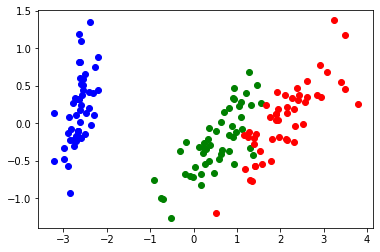

In [ ]:
def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [ ]:
def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    mu[target] = to_membership_values(iris_labels, target)

In [ ]:
def gr_membership_contour(estimated_membership):
    x = np.linspace(-4, 4, 50)
    y = np.linspace(-4, 4, 50)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .95), colors='k')
    plt.clabel(membership_contour, inline=1)
    

The main class of the package, called `FuzzySVEstimator`, learns the
membership function $\mu_A$ to a fuzzy set $A$ from a sample of vectors
labeled according to the corresponding membership grades to $A$. This
class exposes an interface analogous to that of estimators in Scikit-Learn,
thus learning happens through invokation of the `fit` method on an insance
of the class, specifying objects and targets as arguments. Once this method
returns, the `estimated_membership_` attribute contains a reference to the
learnt membership function.

100%|██████████| 100/100 [00:17<00:00,  5.61it/s]


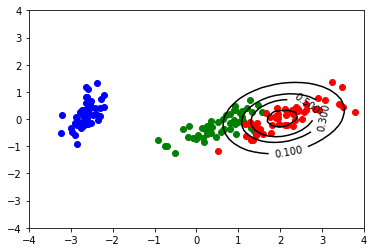

In [ ]:
from mulearn import FuzzyInductor

f = FuzzyInductor()
f.fit(iris_values_2d, mu['Iris-virginica'])
gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

Alternatively, it is possible to predict the membership of an object
through invokation of the `predict` method.

In [ ]:
f.predict([[2, 0]])

array([1.])

Hyper-parameters of the learning algorithm, that according to the
interface required by Scikit-learn should be specified during
object creation, are described here below.

### Fuzzifier

This hyper-parameter, regulating how the learnt membership function
decreases from 1 to 0, is specified through the `fuzzifier` argument.
The corresponding value should be set to a pair containing a class
in the `mulearn.fuzzifier` module and a dictionary of options be
used when the former class is instantiated.

The simplest fuzzifier linearly decreases from 1 to 0. It is specified
via the `mulearn.fuzzifier.LinearFuzzifier` class, which in its simplest
form does not require specific options.

100%|██████████| 100/100 [00:18<00:00,  5.39it/s]


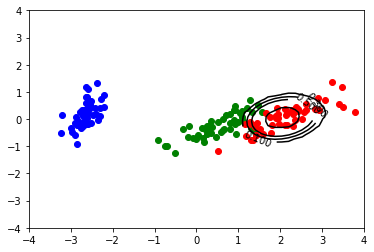

In [ ]:
from mulearn import fuzzifier

f = FuzzyInductor(fuzzifier=(fuzzifier.LinearFuzzifier, {}))
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

When the dictionary provided along with the fuzzifier class
is empty, the former is typically tuned according to the data
provided to the learning algorithm. However, it is possible
to directly specify options in order to set a specific
behaviour for the fuzzifier to be created. For instance, the
following cell relies on an `ExponentialFuzzifier`, whose
exponential decay rate from 1 to 0 is manually set specifying
the `'profile'` and `'alpha'` keys in the dictionary.

100%|██████████| 100/100 [00:19<00:00,  5.19it/s]


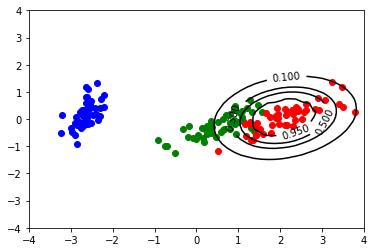

In [ ]:
f = FuzzyInductor(fuzzifier=(fuzzifier.ExponentialFuzzifier,
                             {'profile': 'alpha', 'alpha': 0.25}))
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

### Kernel

100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


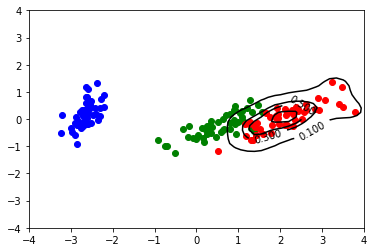

In [ ]:
from mulearn import kernel

f = FuzzyInductor(k=kernel.GaussianKernel(.3))
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

Academic license - for non-commercial use only


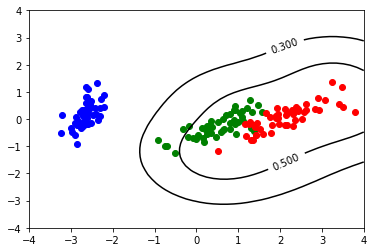

In [ ]:
from mulearn import optimization as opt

try:
    f = FuzzyInductor(solve_strategy=(opt.solve_optimization_gurobi, {}))
    f.fit(iris_values_2d, mu['Iris-virginica'])

    gr_dataset()
    gr_membership_contour(f.estimated_membership_)
    plt.show()
except (ModuleNotFoundError, ValueError):
    print('Gurobi not available')

100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


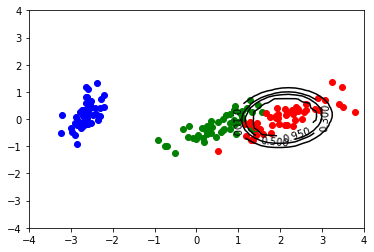

In [ ]:
f = FuzzyInductor(fuzzifier=(fuzzifier.ExponentialFuzzifier,
                             {'profile': 'alpha', 'alpha': 0.15}),
                  k=kernel.GaussianKernel(1.5),
                  solve_strategy=(opt.solve_optimization_tensorflow,
                                  {'n_iter': 20}),
                  return_profile=True)
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

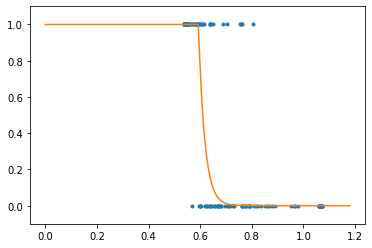

In [ ]:
plt.plot(f.profile_[0], mu['Iris-virginica'], '.')
plt.plot(f.profile_[1], f.profile_[2])
plt.ylim((-0.1, 1.1))
plt.show()

In [ ]:
sigmas = [.225,.5]
parameters = {'c': [1,10,100],
              'k': [kernel.GaussianKernel(s) for s in sigmas]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import logging
import warnings

logging.getLogger('mulearn').setLevel(logging.ERROR)

f = FuzzyInductor()

with warnings.catch_warnings():
    warnings.simplefilter('ignore', FitFailedWarning)

    virginica = GridSearchCV(f, param_grid=parameters, cv=2)
    virginica.fit(iris_values_2d, mu['Iris-virginica'])

100%|██████████| 100/100 [00:18<00:00,  5.42it/s]


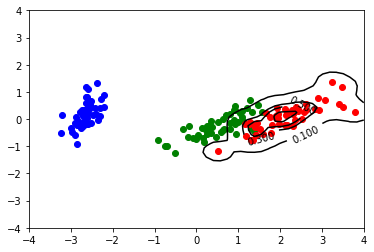

In [ ]:
gr_dataset()
gr_membership_contour(virginica.best_estimator_.estimated_membership_)
plt.show()

In [ ]:
import pickle

saved_estimator = pickle.dumps(virginica.best_estimator_)

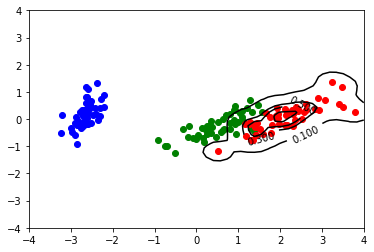

In [ ]:
loaded_estimator = pickle.loads(saved_estimator)

gr_dataset()
gr_membership_contour(loaded_estimator.estimated_membership_)
plt.show()